In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers  

# 같은 디렉토리에 iris.csv파일 불러오기
csv = pd.read_csv("iris.csv")

# 판다스의 csv모듈
X = csv[["sepal_length", "sepal_width","petal_length","petal_width"]].as_matrix()

# 클래스 레이블 (one hot coding용)
bclass = {"Iris-virginica":[1,0,0], "Iris-setosa":[0,1,0], "Iris-versicolor":[0,0,1]}
y = np.empty((150,3))     
# i는 index(숫자), v는 label의 원자값(문자열)들어감 
for i, v in enumerate(csv["iris_type"]): 
    y[i] = bclass[v]                 

# 훈련 전용 데이터와 테스트 전용 데이터로 나누기 (train데이터 100개, test데이터 50개)
X_train, y_train = X[0:100], y[0:100]
X_test,  y_test  = X[100:150], y[100:150]

C:\anaconda\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.


In [2]:
#순차적 계층화 준비
model = tf.keras.Sequential()  

# -------------------input node:4, hidden node:15---------------------------
model.add(layers.Dense(15, input_shape=(4,)))  
model.add(layers.Activation('relu'))  
model.add(layers.Dropout(0.1))        

# ------------------------hidden node : 15-------------------------------------
model.add(layers.Dense(15))       
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.1))

#-------------------------output node : 3-------------------------------------
model.add(layers.Dense(3))
model.add(layers.Activation('softmax')) 

# 모델 구축하기
model.compile(
    loss='categorical_crossentropy',  #다중 교차엔트로피
    optimizer="rmsprop",   #최적화 기법 중 하나
    metrics=['accuracy'])  #정확도 측정

In [3]:
#데이터 훈련
'''
batch_size       : 몇번마다 수정할 것인가.
epochs           : 최대 몇번 반복할 것인가(early stopping에 걸릴 수 있음)
valdiation_split : 데이터가 잘 학습되었는지 확인 (training set에서 몇프로 만큼?)
callbacks        : moniotr(val_loss혹은 val_accuracy) 가 patience만큼 개선되지 않으면 종료
verbose          : 0:미출력, 1:개선되는과정 출력, 2:매 에포크마다 출력
'''
hist = model.fit(
    X_train, y_train,
    batch_size=30,  
    epochs=8000,    
    validation_split=0.2,  
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=500)],  
    verbose=0) 

# 테스트 데이터로 평가하기 
score = model.evaluate(X_test, y_test)
print('test_loss: ', score[0])
print('test_acc: ', score[1])

50/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 15)                75        
_________________________________________________________________
activation (Activation)      (None, 15)                0         
_________________________________________________________________
dropout (Dropout)            (None, 15)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 15)                240       
_________________________________________________________________
activation_1 (Activation)    (None, 15)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 4

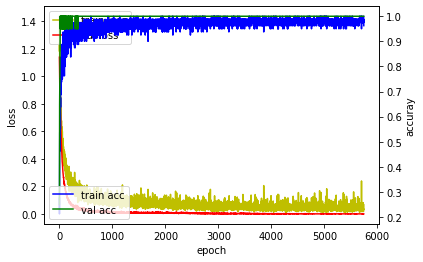

In [7]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [6]:
# 인풋값이 다음과 같은 sample이 존재
sample=[[5.7, 3.8, 1.7, 0.3]]

# 각 클래스 레이블일 확률은?
y_pred_prob = model.predict_proba(sample)
print(y_pred_prob)

# 확률이 가장 높은 클래스는?
y_pred_class=model.predict_classes(sample)
print(y_pred_class)

[[0.0000000e+00 9.9999928e-01 6.6396944e-07]]
[1]
